**The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.**

**Mount(connect) to Google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


**Data Loading and Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [ ]:
df = pd.read_csv('drive/MyDrive/OASIS TASK/cars.csv')

In [ ]:
df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df.tail(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# to check whether the data has any duplicate values.

In [ ]:
set(df.duplicated())

{False}

In [ ]:
df.duplicated().sum()

0

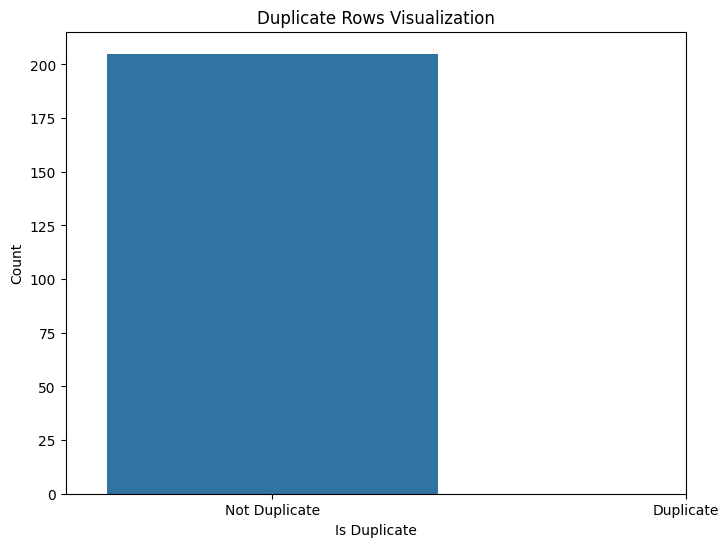

In [ ]:
# Check for duplicates and create a new column "Is_Duplicate"
df['Is_Duplicate'] = df.duplicated()
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a count plot to visualize duplicates
plt.figure(figsize=(8, 6))
sns.countplot(x='Is_Duplicate', data=df)
plt.xlabel('Is Duplicate')
plt.ylabel('Count')
plt.title('Duplicate Rows Visualization')
plt.xticks([0, 1], ['Not Duplicate', 'Duplicate'])  # Customize x-axis labels
plt.show()

# Drop the "Is_Duplicate" column if not needed
df.drop(columns=['Is_Duplicate'], inplace=True)

In [ ]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [ ]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
df["cylindernumber"]

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: cylindernumber, Length: 205, dtype: object

# Visualizations

<ipython-input-17-09bcf96a8476>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


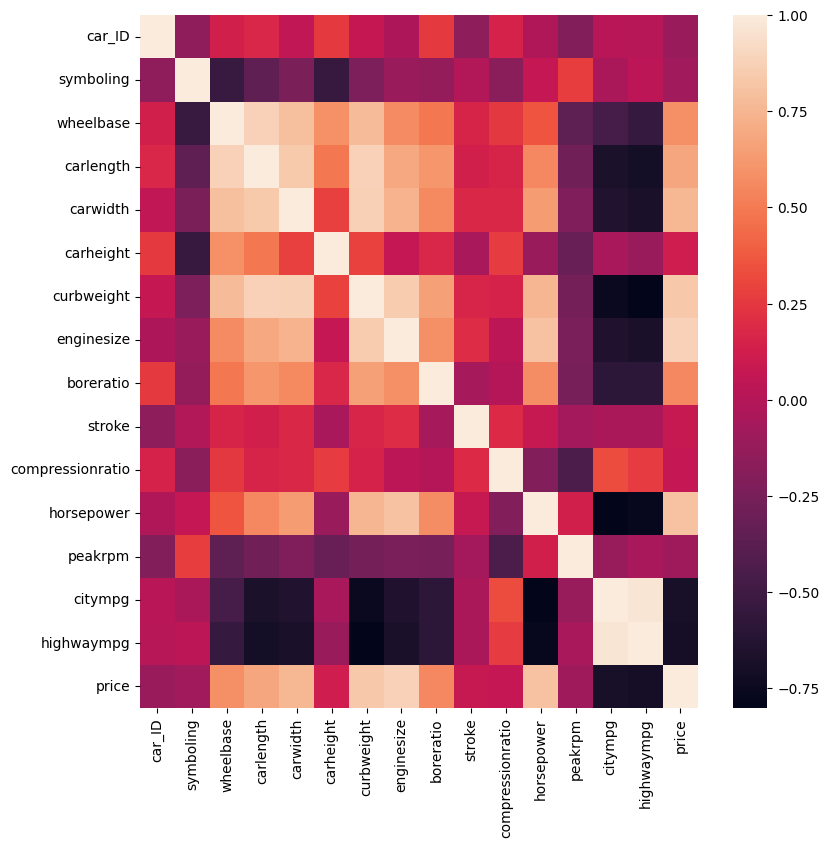

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr())
plt.show()

<ipython-input-19-86d9730e2a6e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price)


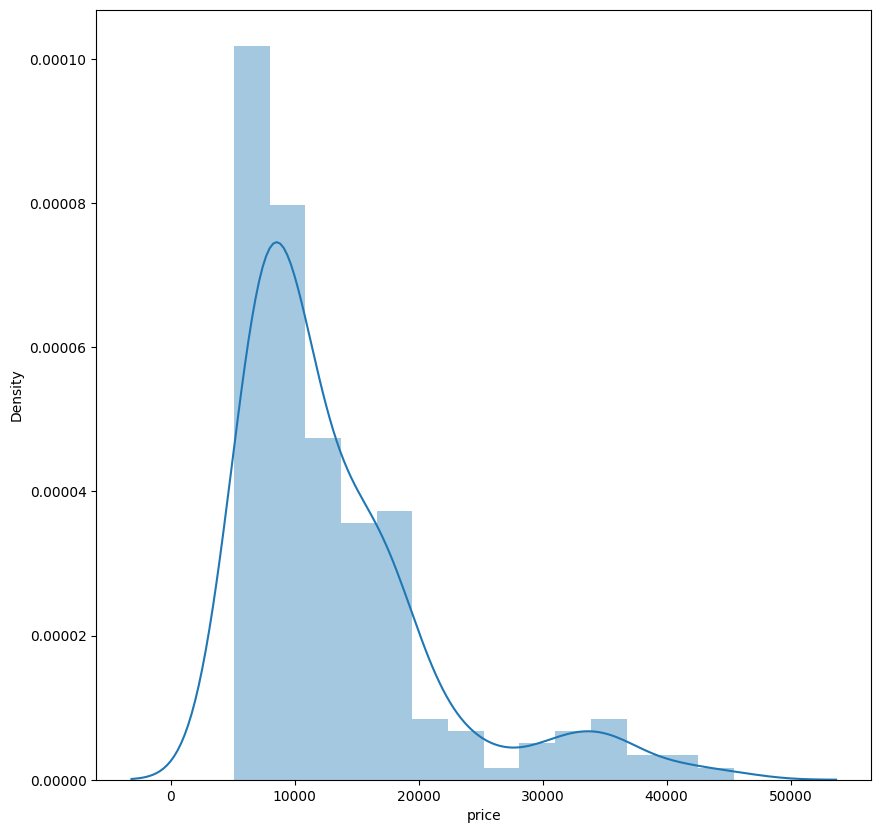

In [ ]:
plt.figure(figsize=(10, 10))
sns.distplot(df.price)
plt.show()

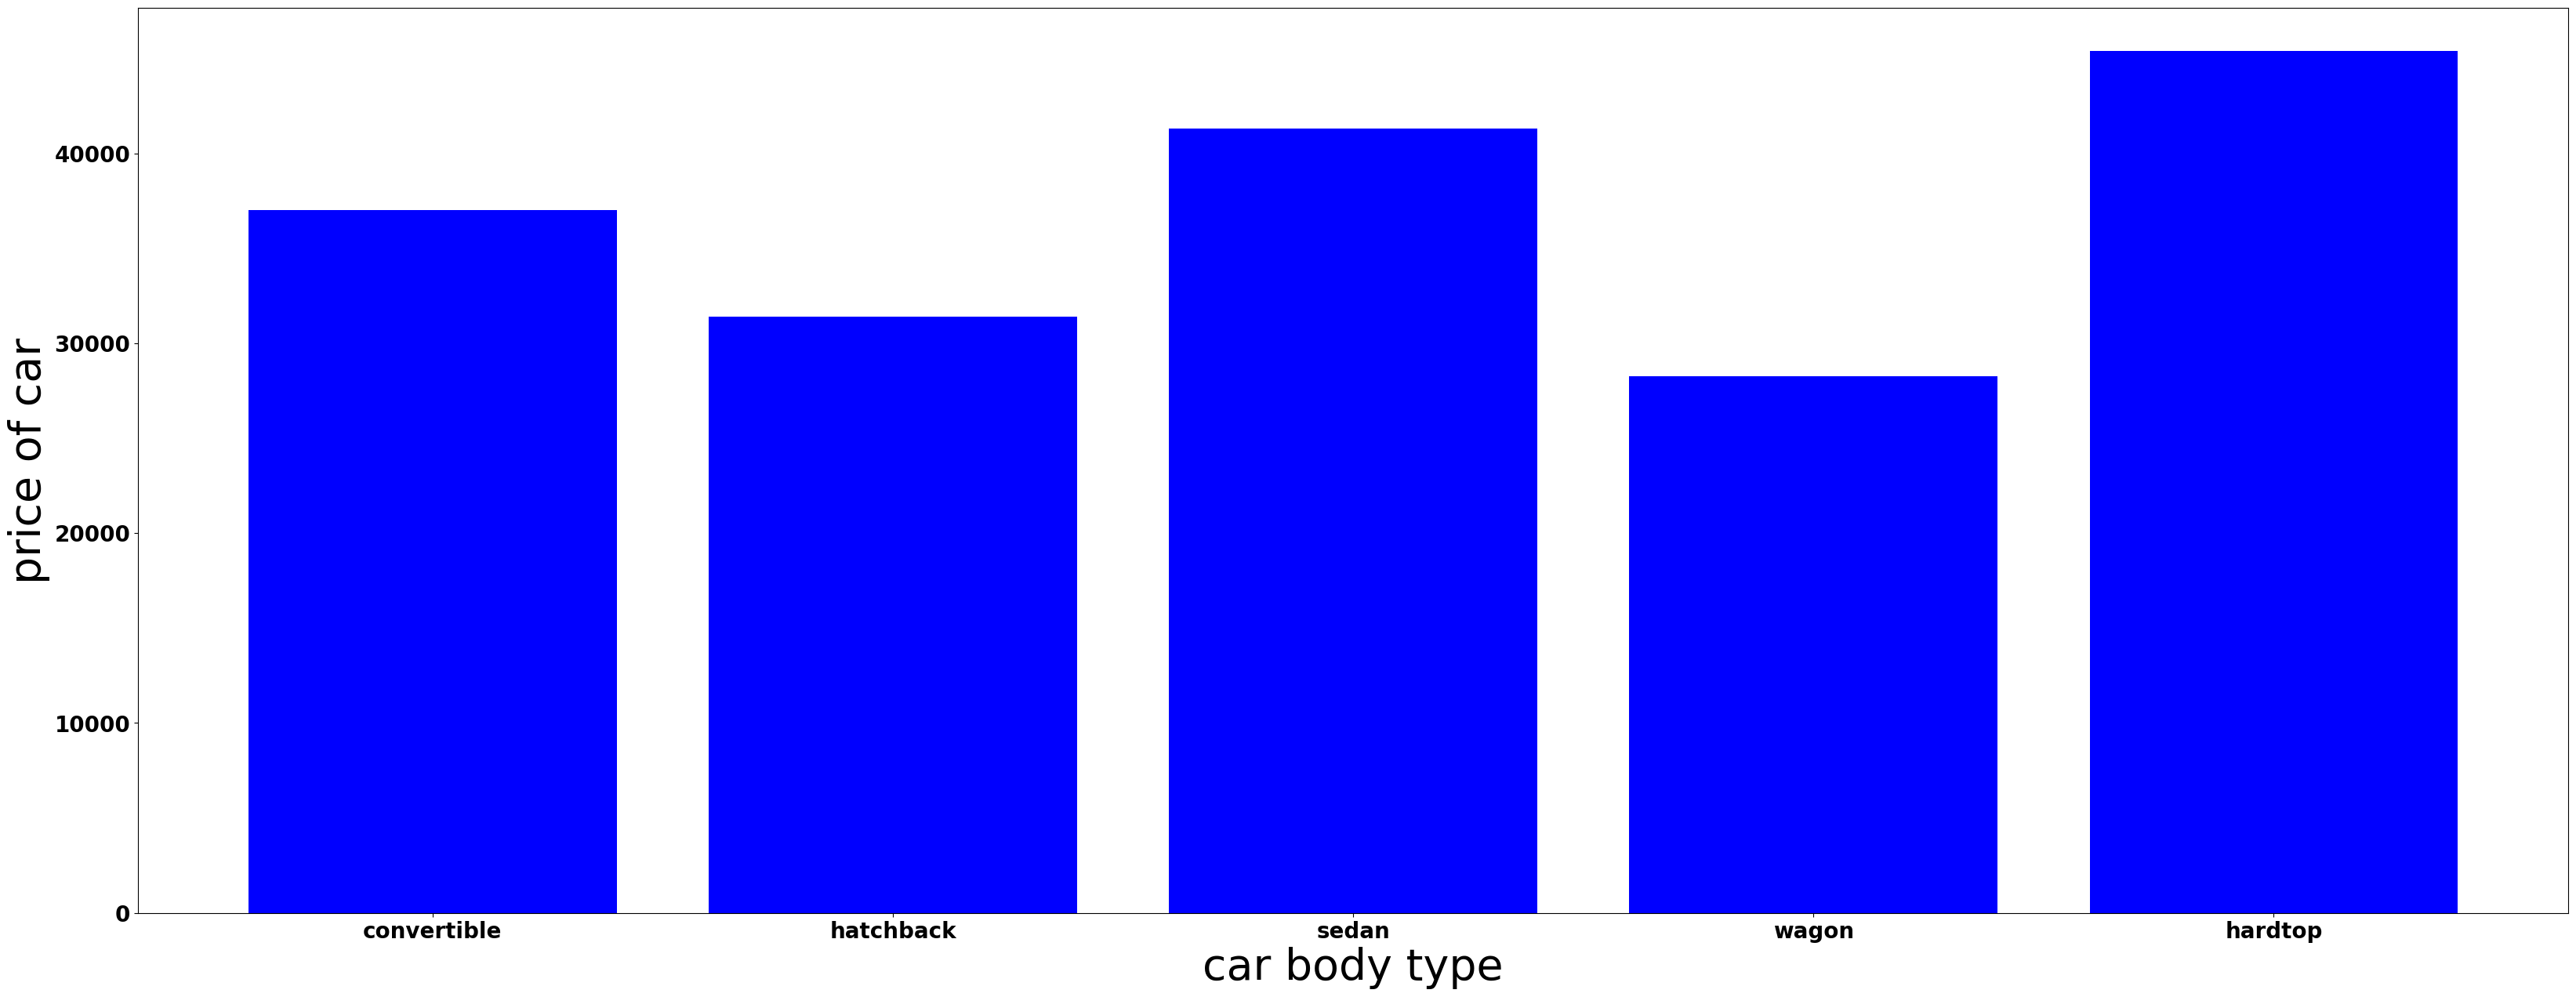

In [ ]:
data = pd.DataFrame(df)
y=data['price']
x=data['carbody']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("car body type",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x,y, color='b',align='center')
plt.show()

Text(0, 0.5, 'price of car')

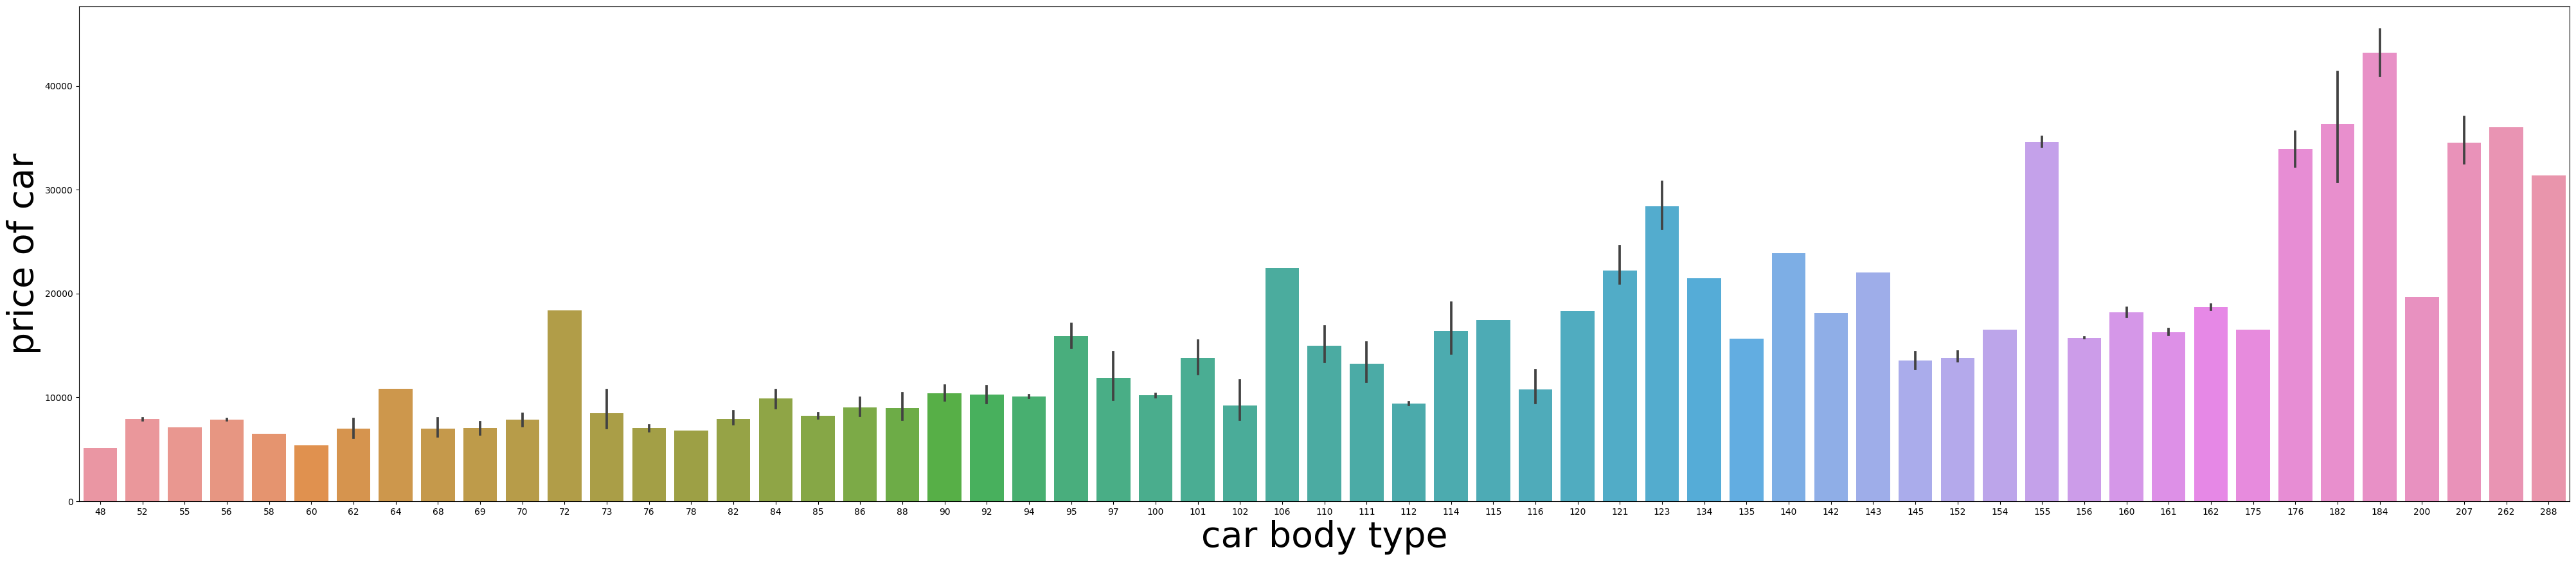

In [ ]:
plt.figure(figsize=(50,10))
sns.barplot(data=df,x='horsepower',y='price')
plt.xlabel("car body type",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)

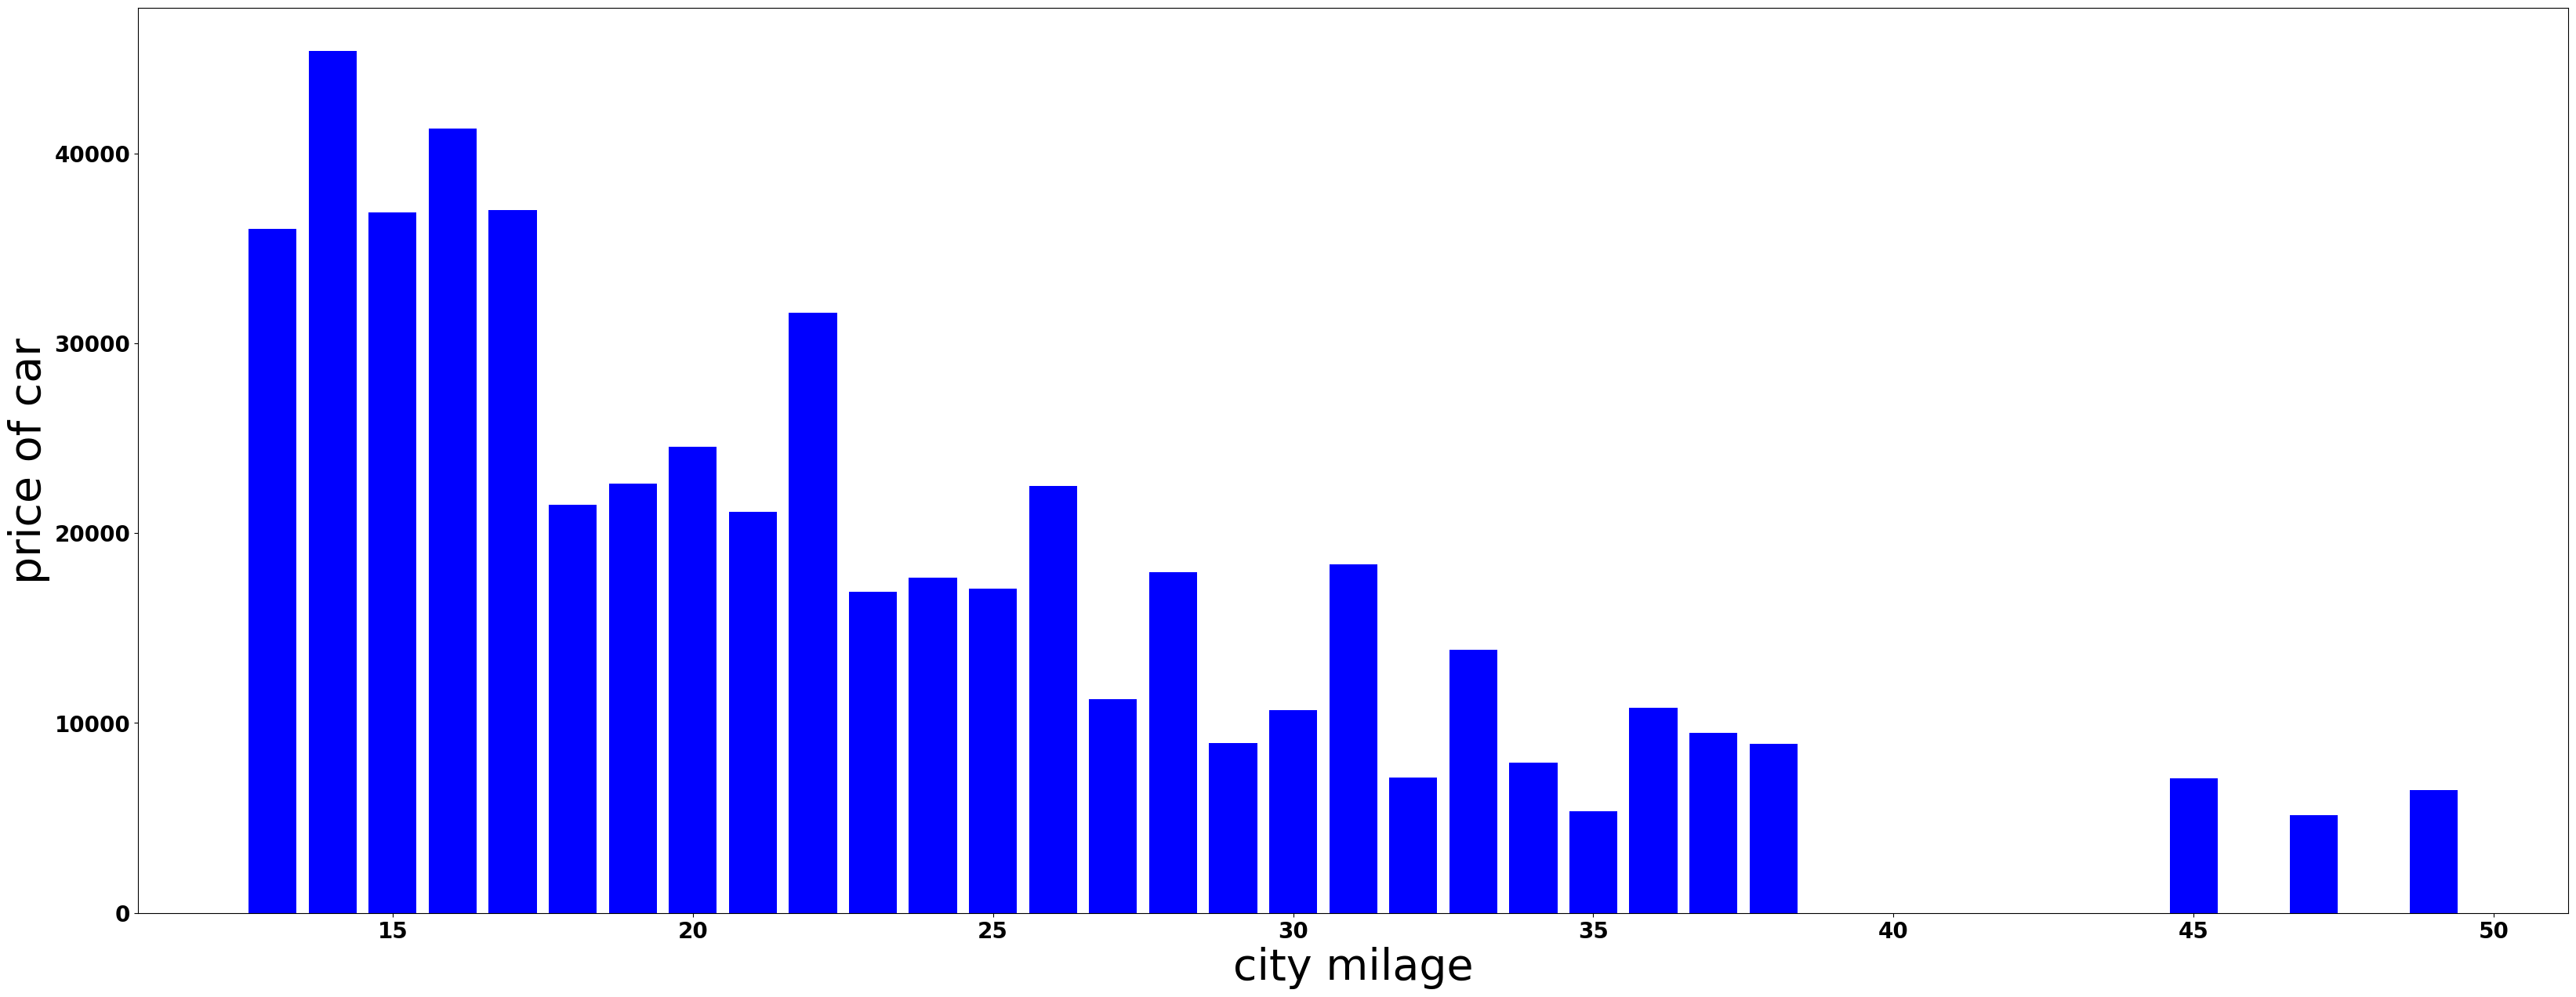

In [ ]:
data = pd.DataFrame(df)
y=data['price']
x=data['citympg']
x1 = data['highwaympg']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("city milage",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x,y, color='b',align='center')
plt.show()

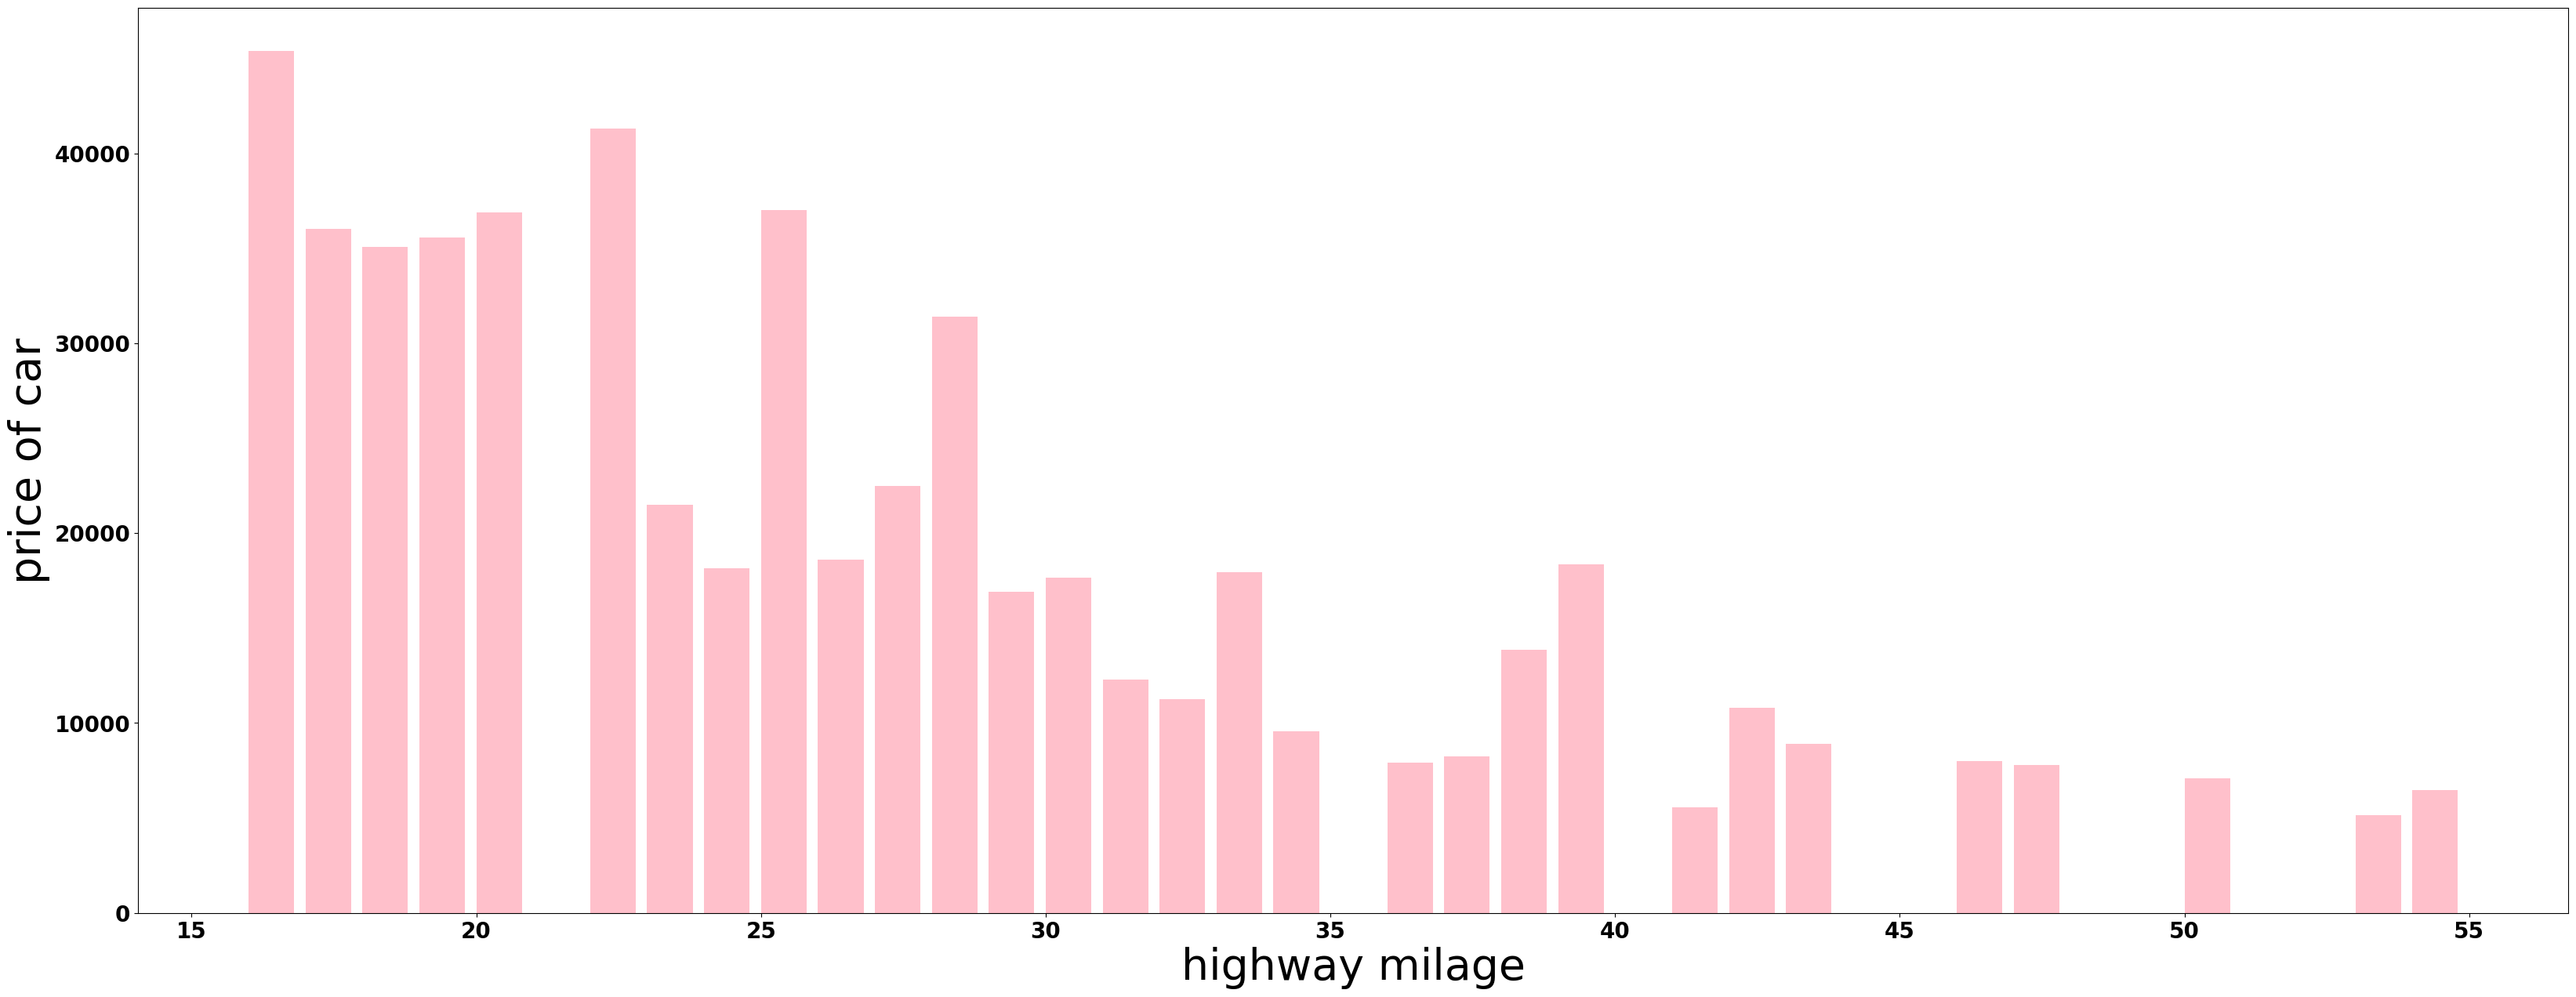

In [ ]:
data = pd.DataFrame(df)
y=data['price']
x1 = data['highwaympg']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("highway milage",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x1,y, color='pink',align='edge')
plt.show()

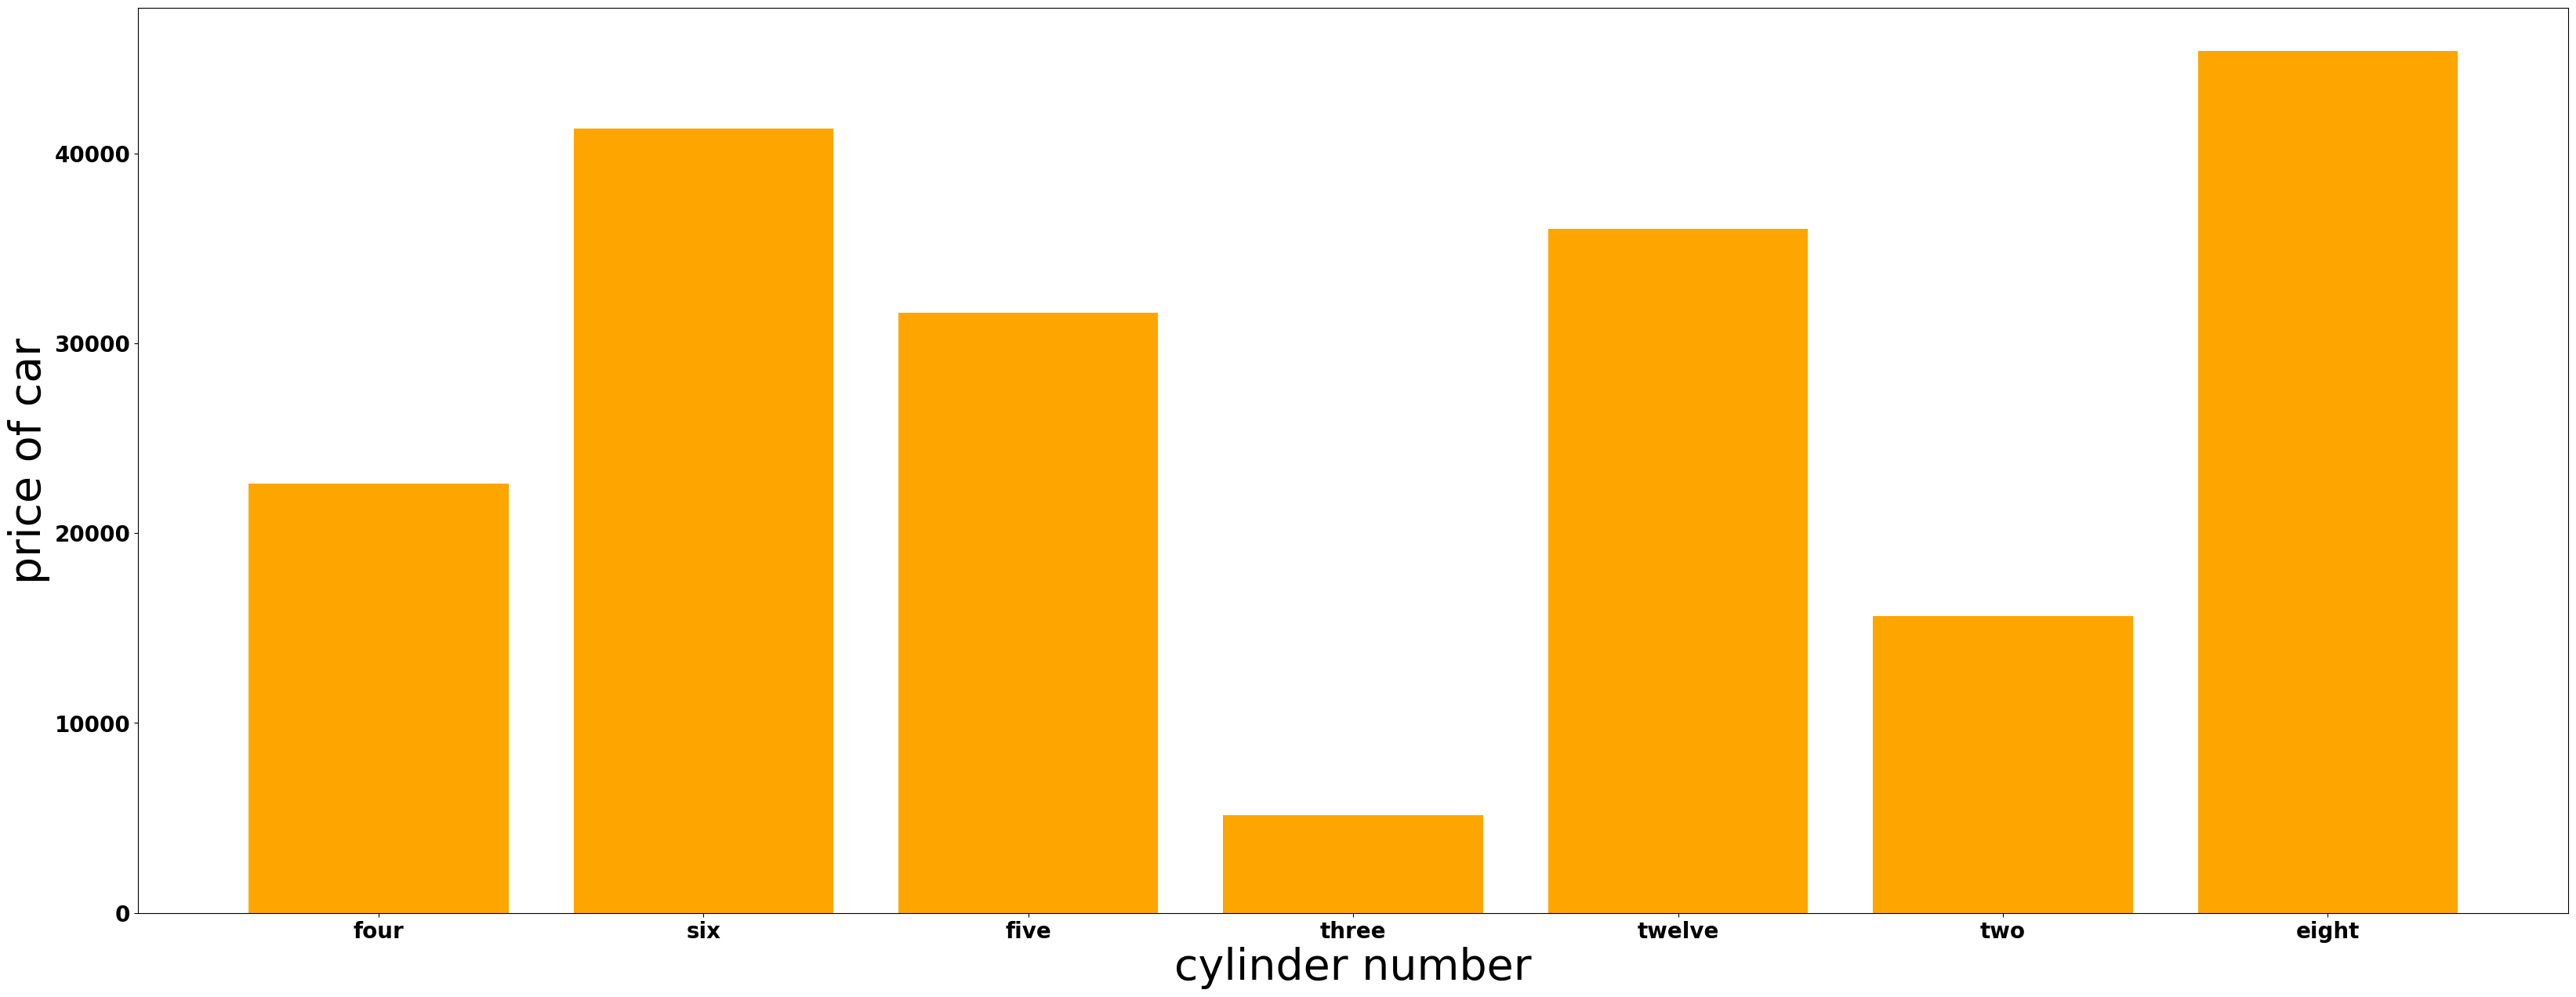

In [ ]:
data = pd.DataFrame(df)
y=data['price']
x1 = data['cylindernumber']
pr= plt.figure(figsize=(40, 15))
plt.xlabel("cylinder number",fontsize = 40)
plt.ylabel("price of car",fontsize = 40)
plt.xticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.yticks(fontweight='bold',rotation='horizontal',fontsize=20)
plt.bar(x1,y, color='orange',align='center')
plt.show()

<Axes: ylabel='price'>

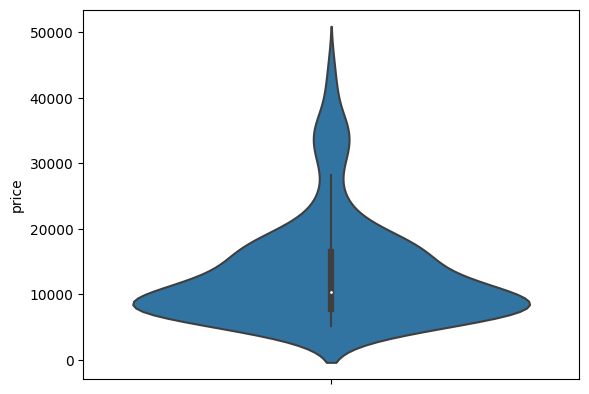

In [ ]:
sns.violinplot(data=df,y='price',hue='CarName')

<Axes: title={'center': 'correlation between horsepower and price'}, xlabel='horsepower', ylabel='price'>

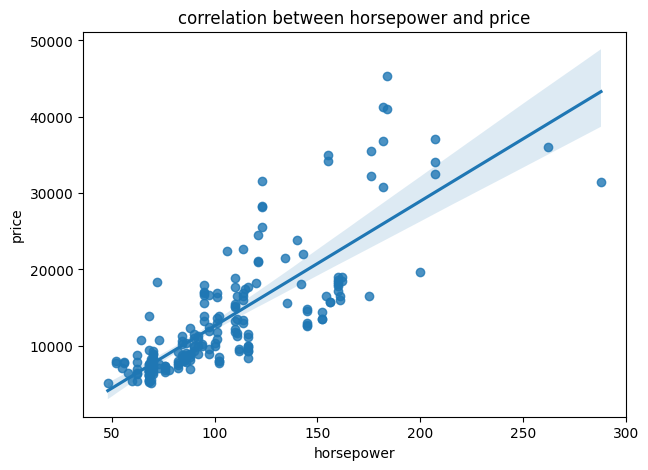

In [ ]:
pr= plt.figure(figsize=(7,5))
plt.title("correlation between horsepower and price")
sns.regplot(x="horsepower",y="price",data=df)

#Data Encoding

In [ ]:
# checking the distribution of categorical data
print(df['fueltype'].value_counts())
print(df['price'].value_counts())
print(df['horsepower'].value_counts())

gas       185
diesel     20
Name: fueltype, dtype: int64
8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64
68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64


In [ ]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


#Modeling

In [ ]:
X = df.drop(['CarName','price'],axis=1)
Y = df['price']

In [ ]:
X

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28
201,202,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25
202,203,-1,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23
203,204,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,26,27


In [ ]:
Y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

#Evaluation and Visualization:

In [ ]:
p = "price"
data = df[["horsepower",
             "citympg", "highwaympg", "price"]]
x = np.array(data.drop([p], 1))
y = np.array(data[p])

<ipython-input-44-5d8617516c33>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([p], 1))


In [ ]:
X = df.drop('price',axis=1)
y = df['price']

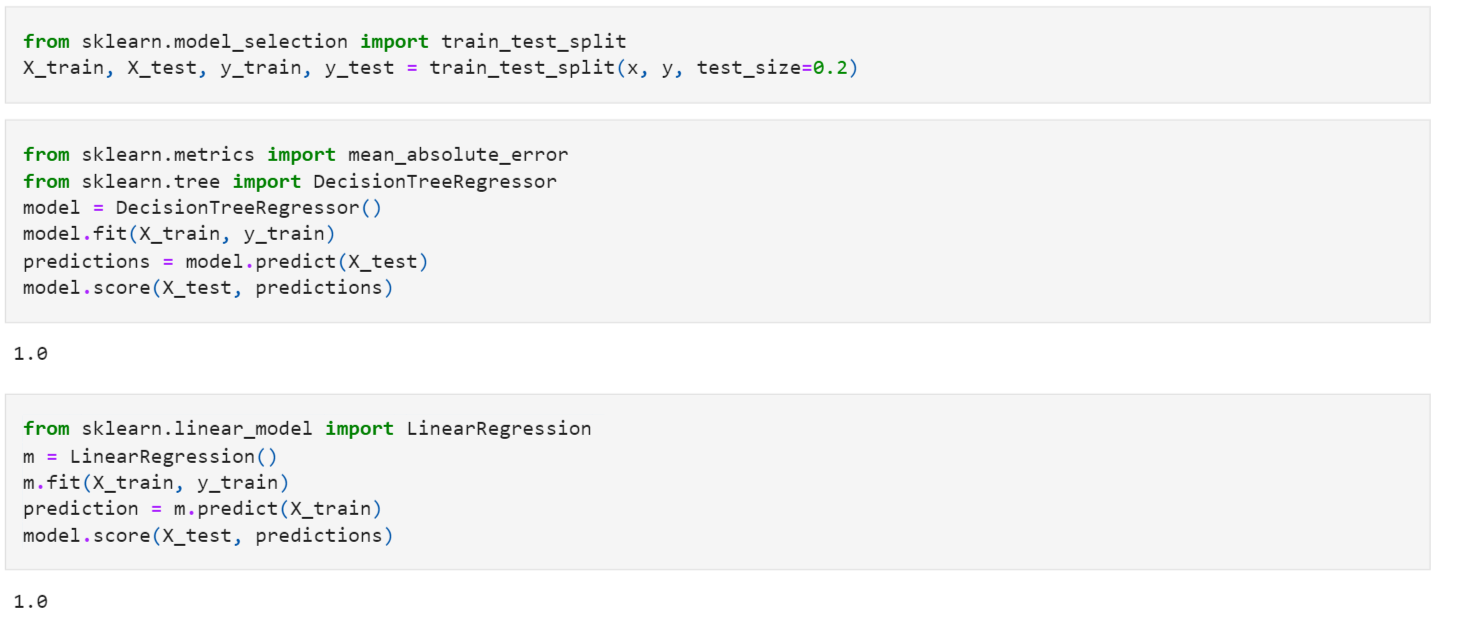

# Done By Kannan Santhana Gopala Krishnan